# Hierarchical Clustering

## What is hierarchical clustering?

Hierarchical clustering is an unsupervised learning method that builds a multilevel *tree* (or a **dendrogram**) showing how observations group together from clusters with a single observations all the way up to one giant cluster that contains all observations.

The idea is simple: reveal **nested structure** by successively **merging** (or **splitting**) clusters based solely on pair-wise dissimilarity or similarity measures, without pre-specifying the number of clusters $k$.

---

### How It Works


| Direction     | Nickname        | Conceptual algorithm                                                                                                     |
| ------------- | --------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Bottom-up | **Agglomerative** | 1. Start with every point in its own cluster.<br>2. **Find the closest pair** of clusters using a linkage rule.<br>3. Merge them; record the distance in the dendrogram.<br>4. Update the distance matrix; repeat until only one cluster remains. |
| Top-down  | Divisive      | 1. Start with all points in one big cluster.<br>2. **Split** the cluster that contributes most to overall dissimilarity.<br>3. Re-evaluate which cluster to split next; stop at desired granularity.               |

Linkage rules for agglomerative:

* Single: distance between nearest members
* Complete: distance between farthest members
* Average: average pairwise distance
* Ward: increase in within-cluster SSE (variance-minimizing)

---

### Pros and Cons

✅ Only requires a distance or similarity matrix (and a linkage rule).  
✅ Produces an "interpretable" dendrogram that maintains a hierarchical structure.  
✅ No requirement to choose $k$ in advance; you can “cut” the tree later based on domain knowledge.    

❌ High computational cost: quadratic memory & time for naïve agglomerative algorithms.  
❌ Greedy merges always chooses what seems best right now, not what might be best in the long run.   
❌ Sensitive to outliers (depending on the linkage rules and measures).   

---

### 🔑 Key Hyper-parameters (Hierarchical Clustering in `scipy`)

| Parameter in `scipy`        | Meaning                                            | Typical choices / notes                                                              |
| --------------------------- | -------------------------------------------------- | ------------------------------------------------------------------------------------ |
| `method` (in `linkage`)     | How to measure inter-cluster distance              | `"ward"` (numerical only), `"complete"`, `"average"`, `"single"`                     |
| `metric` (in `pdist`)       | Distance metric used to compute pairwise distances | `"euclidean"`, `"cityblock"`, `"cosine"`, etc.                                       |
| `t` (in `fcluster`)         | Threshold for cutting dendrogram                   | A number (e.g. height or number of clusters depending on `criterion`)                |
| `criterion` (in `fcluster`) | How to interpret `t`                               | `"maxclust"` (number of clusters), `"distance"` (cut height), `"inconsistent"`, etc. |



> Note: You can also use the `AgglomerativeClustering` function from `sklearn.cluster`, but `sklearn.cluster` does not contain functions for generating the dendrogram.

---

### Example with the Palmer Penguin data

We will use the palmer penguin data to illustrate hierarchical clustering. 

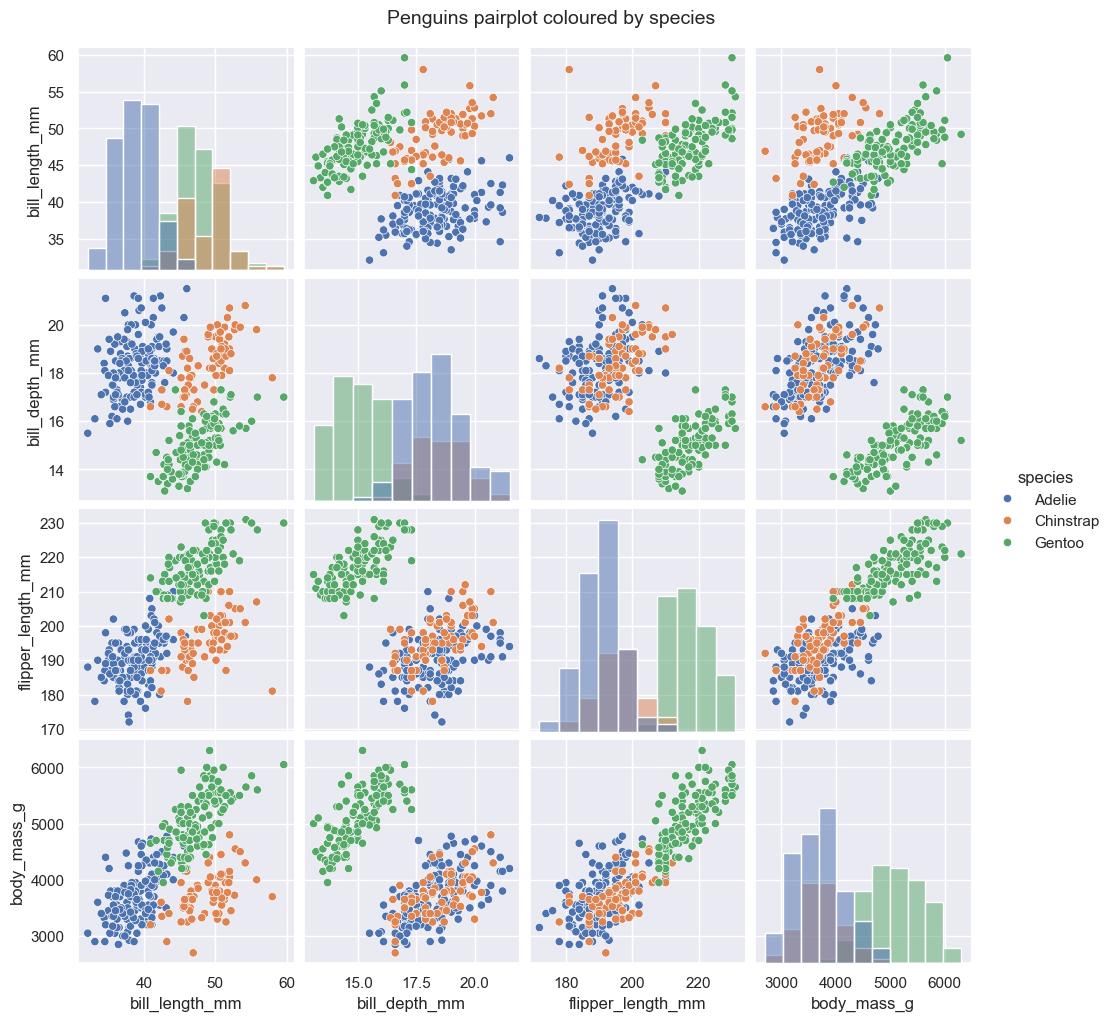

In [ ]:
import seaborn as sns
# Load the Palmer penguins dataset
penguins = sns.load_dataset("penguins").dropna()

# Select the four numeric variables to include
numeric_vars = ["bill_length_mm", "bill_depth_mm",
                "flipper_length_mm", "body_mass_g"]

# Create the pairplot, colouring by species
sns.pairplot(
    data=penguins,
    vars=numeric_vars,
    hue="species",
    diag_kind="hist",       # or 'kde'
    corner=False            # show upper-triangle too; set True if you prefer half
)

plt.suptitle("Penguins pairplot coloured by species", y=1.02, fontsize=14)
plt.show()


In [ ]:
# Prepare data for clustering

import seaborn as sns
import pandas as pd

# Load penguin dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins = penguins.dropna()

# Use numeric features for clustering
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = penguins[features]


Try the following code to 
- fit a hierarchical clustering on the penguin data
- draw the corresponding dendrogram 
- visualize the clustering results with true labels.

You can play around with code to investigate the properties of hiearchical clustering. 

In [ ]:
# Hierarchical clustering using SciPy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster


# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Try without scaling as well
# X_scaled = X


# Perform hierarchical clustering using SciPy
Z = linkage(X_scaled, method="ward")  # Try 'average', 'complete', etc.

# Get cluster labels for a fixed number of clusters (e.g., 3)
cluster_labels = fcluster(Z, t=3, criterion='maxclust')

# Add to your DataFrame
penguins["cluster"] = cluster_labels

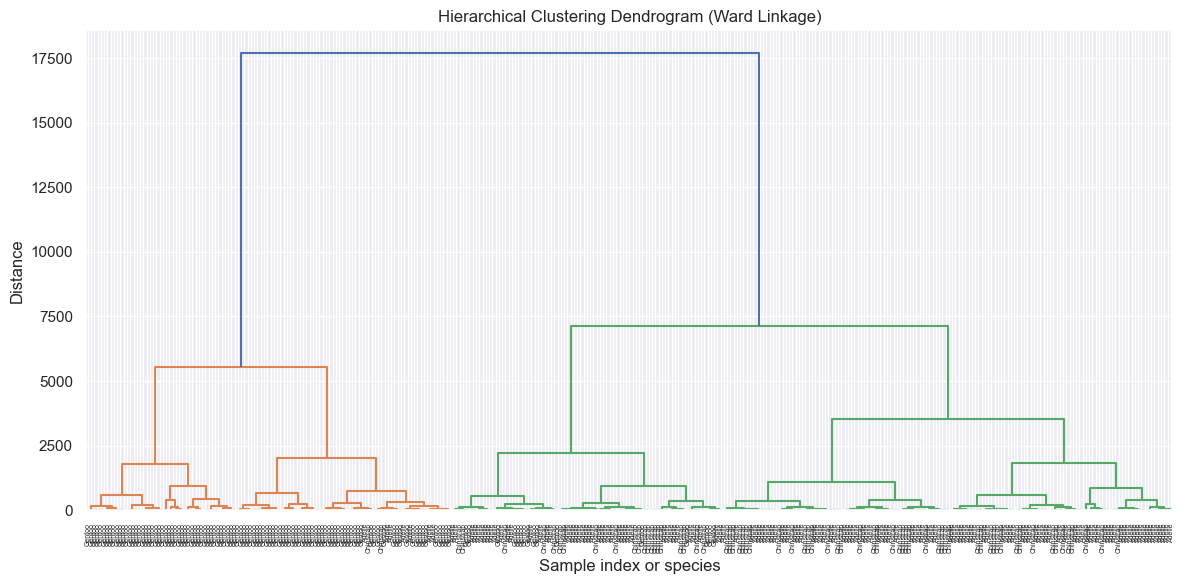

In [ ]:
from scipy.cluster.hierarchy import  dendrogram
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=penguins["species"].values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Sample index or species")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

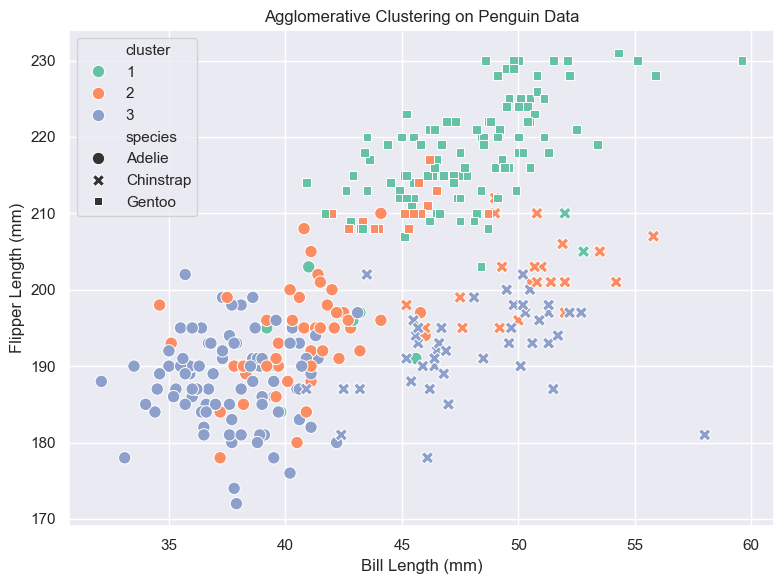

In [27]:

# Visualize the clusters using features of your choice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, x="bill_length_mm", y="flipper_length_mm",
                hue="cluster", palette="Set2", style="species",s=80)
plt.title("Agglomerative Clustering on Penguin Data")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()